# Synthetic Continuous Multi-Parameter Scenario

We use this notebook to generate simulated datasets for the multi-dimensional parameter tuning solutions in the continuous action space.

In [ ]:
import copy
import itertools
import pandas as pd
# import numpy as np

from IPython.display import Markdown, display
from multi_d_simulator import *
seed = 7
np.random.seed(seed)

## 1. Parameters

In this section, we define how the data will look like. Some key aspects that you can control:
* Contexts
* Number of actions and the corresponding ranges
* Reward range
* Noise level
* Discretization policies
* Number of samples per context*action

In [2]:
simulator_args = dict(
    
    # Working directory
    folder_path = f'/mnt/c/w/repos/slate_sim/data/seed{seed}',
    
    # Context
    contexts = {
        'platform': ['Mac', 'Windows'], 
        'network': ['wifi', 'wired'], 
        'country': ['US', 'CA']
    },
    
    # Action
    actions = {
        'x': {'mean': 2, 'min': 0, 'max': 4, 'std_range': [0.1, 2.0]},
        'y': {'mean': 1, 'min': 0, 'max': 3, 'std_range': [0.1, 2.0]}, 
        'z': {'mean': 3, 'min': 0, 'max': 2, 'std_range': [0.1, 2.0]}
    },
    discretization_fine_grain = 100,
    discretization_policy = {'x': 32, 'y': 24, 'z': 16},
    share_discretized_grid = True,
    
    # Reward
    reward_range = [0.05, 0.35],
    reward_minimization = True,
    interaction_level = 3,
    coefficient_range = [0.1, 2],
    
    # Shift from the base surface (multipliers)
    coefficient_scale_range = [0.8, 1.2], 
    dist_mean_change_range = [0.7, 1.3],
    dist_std_change_range = [0.7, 1.3],
    
    # Sample size and Noise 
    # (known_n_per_config: Int or False. If False, the sample size will estimated according to the required confidence level)
    known_n_per_config = 5000,
    ci_mean = 0,
    ci_std = 0.1,
    ci_width = 0.005,
)

In [3]:
# Generate a simulator
sim = MultiDSimulator(**simulator_args)

========== Summary of the Simulation Task ==========
Data Size per Configuration: 5,000
Numer of Unique Configurations: 12,288
Data Size per Context: 61,440,000
Numer of Unique Contexts: 8
Total Data Size: 491,520,000


## 2. Generate a Base Distribution

### >>> Base Distribution

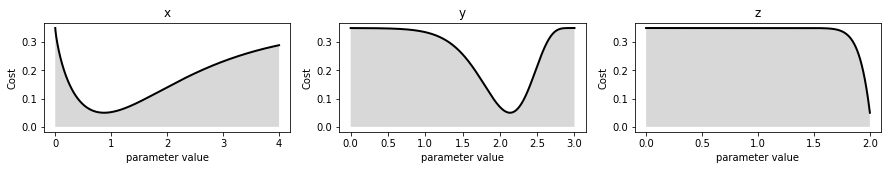

* Cost = 1.7122\*f<sub>x</sub>(x) + 1.1109\*f<sub>y</sub>(y) + 0.6662\*f<sub>z</sub>(z) + 1.7442\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 1.0277\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.9441\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 0.9764\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

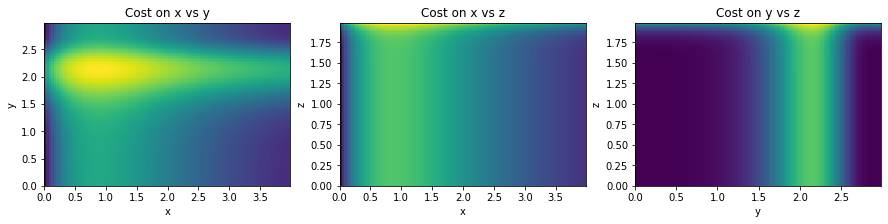

In [4]:
# Generate a base distribution
display(Markdown('### >>> Base Distribution'))
dist_base = sim.gen_param_reward(plot=True)

# Complete Reward Formula
sim.discretize(dist_base)
display(Markdown('* {0}'.format(dist_base['configs']['reward_equation'])))

# Generate groundtruth data
num_values, _, _ = sim.gen_data(dist_base, 1, add_error=False, plot_2d=True)

## 3. Adjust Distributions and Coefficients by Context

In [5]:
# Initialization
dist_context = {}
discretized_context = {}
df_summary = pd.DataFrame()
should_plot = True
df_all = pd.DataFrame()

### >>> [1/8] Generating data for context Mac_wifi_US

####   Distribution

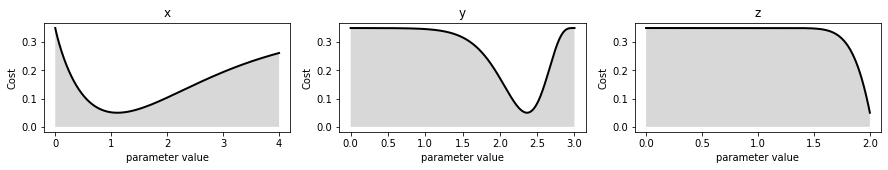

####   Ground Truth

* Cost = 1.3081\*f<sub>x</sub>(x) + 1.1546\*f<sub>y</sub>(y) + 0.6826\*f<sub>z</sub>(z) + 1.13\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 0.8827\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.3983\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 1.1758\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

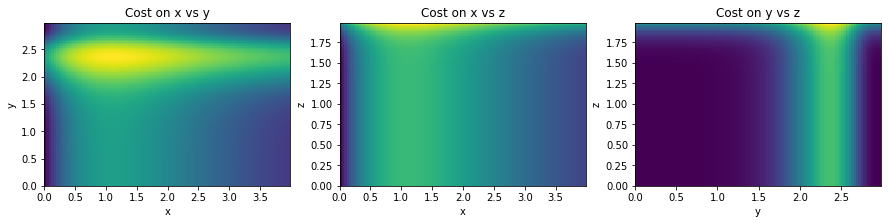

####   Discretized Sapce

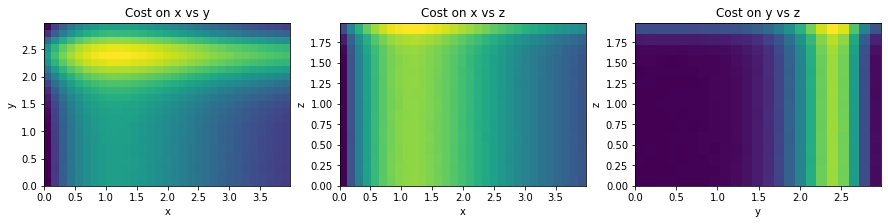

### >>> [2/8] Generating data for context Mac_wifi_CA

####   Distribution

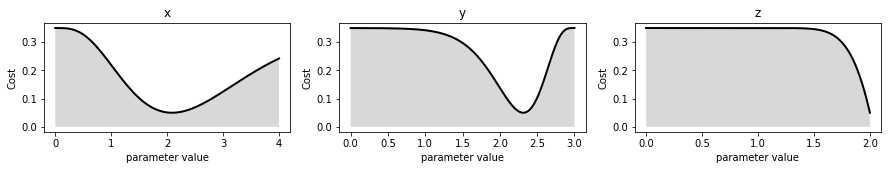

####   Ground Truth

* Cost = 1.3942\*f<sub>x</sub>(x) + 1.03\*f<sub>y</sub>(y) + 0.6781\*f<sub>z</sub>(z) + 1.1036\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 0.7982\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.3879\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 0.8854\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

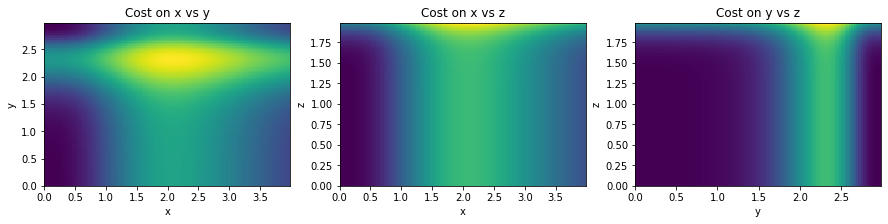

####   Discretized Sapce

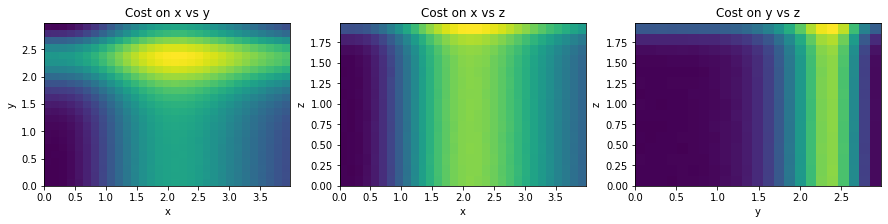

### >>> [3/8] Generating data for context Mac_wired_US

####   Distribution

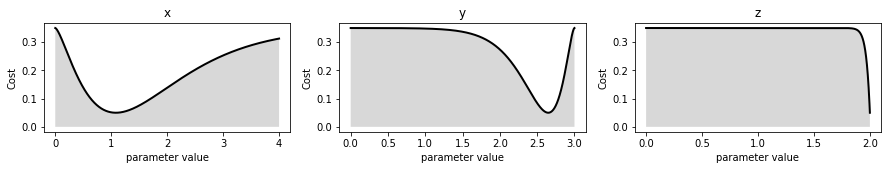

####   Ground Truth

* Cost = 1.4641\*f<sub>x</sub>(x) + 1.2847\*f<sub>y</sub>(y) + 0.6545\*f<sub>z</sub>(z) + 1.209\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 1.3055\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.3823\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 1.1095\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

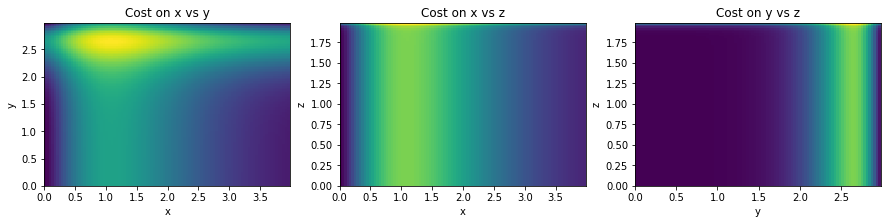

####   Discretized Sapce

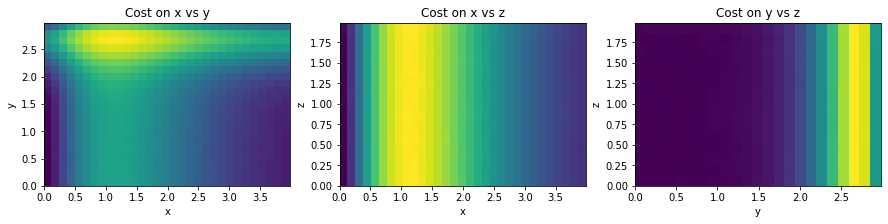

### >>> [4/8] Generating data for context Mac_wired_CA

####   Distribution

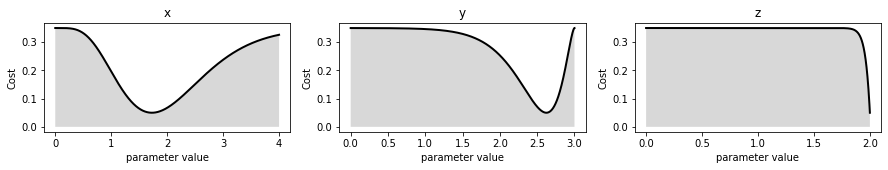

####   Ground Truth

* Cost = 1.5604\*f<sub>x</sub>(x) + 1.146\*f<sub>y</sub>(y) + 0.6502\*f<sub>z</sub>(z) + 1.1808\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 1.1804\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.372\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 0.8355\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

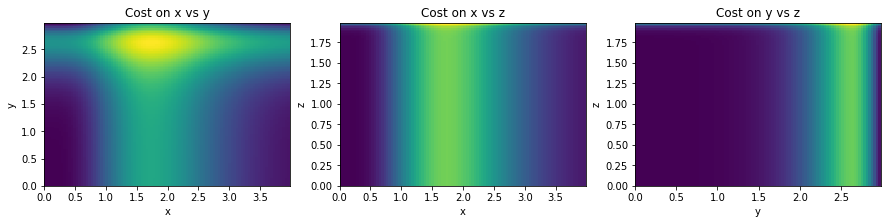

####   Discretized Sapce

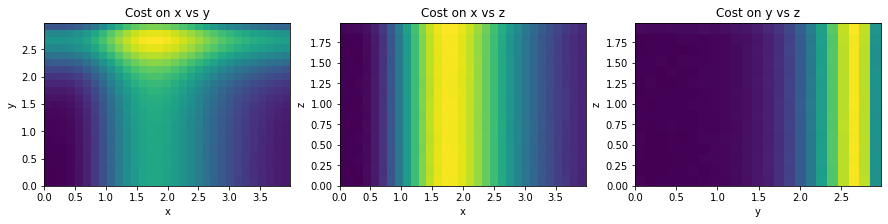

### >>> [5/8] Generating data for context Windows_wifi_US

####   Distribution

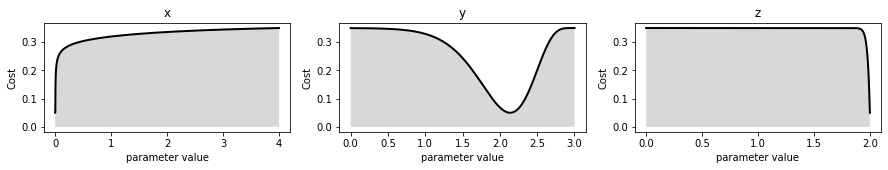

####   Ground Truth

* Cost = 1.6004\*f<sub>x</sub>(x) + 1.1123\*f<sub>y</sub>(y) + 0.8772\*f<sub>z</sub>(z) + 1.436\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 1.0149\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.9615\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 1.1048\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

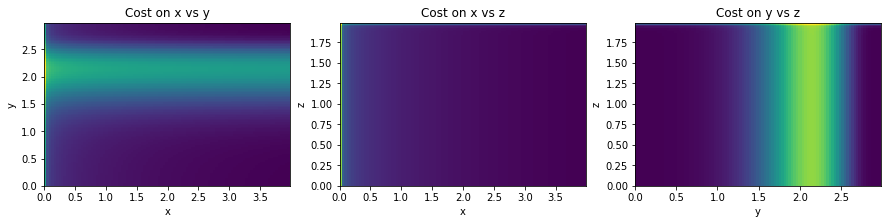

####   Discretized Sapce

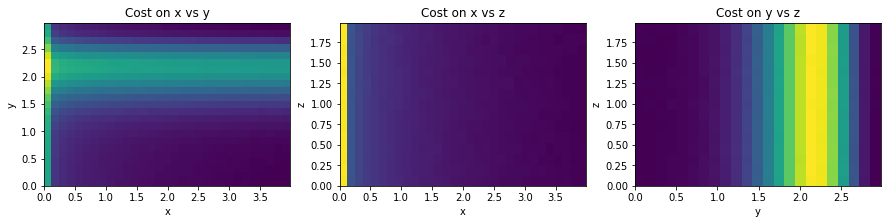

### >>> [6/8] Generating data for context Windows_wifi_CA

####   Distribution

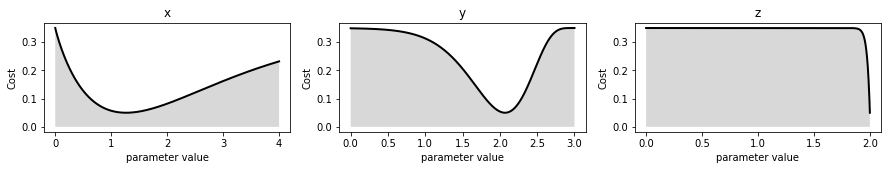

####   Ground Truth

* Cost = 1.7057\*f<sub>x</sub>(x) + 0.9923\*f<sub>y</sub>(y) + 0.8714\*f<sub>z</sub>(z) + 1.4026\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 0.9177\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.9469\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 0.8319\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

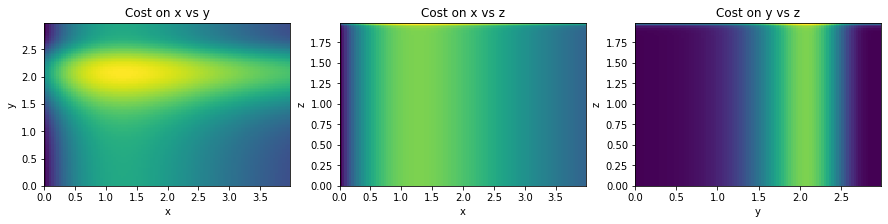

####   Discretized Sapce

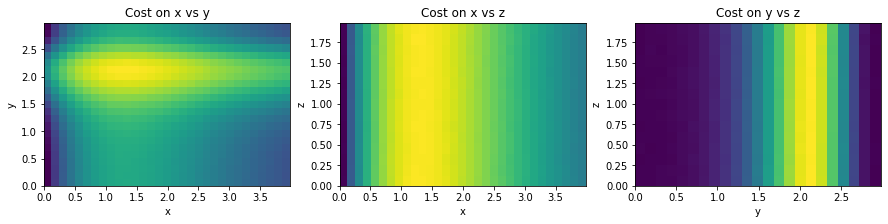

### >>> [7/8] Generating data for context Windows_wired_US

####   Distribution

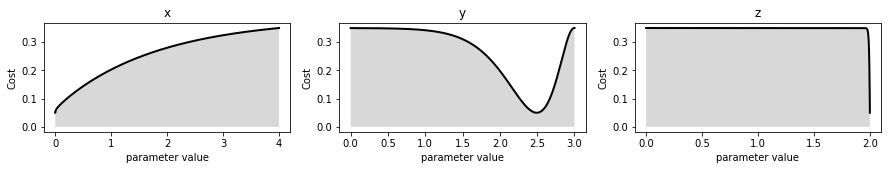

####   Ground Truth

* Cost = 1.7912\*f<sub>x</sub>(x) + 1.2376\*f<sub>y</sub>(y) + 0.841\*f<sub>z</sub>(z) + 1.5365\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 1.5009\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.9391\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 1.0424\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

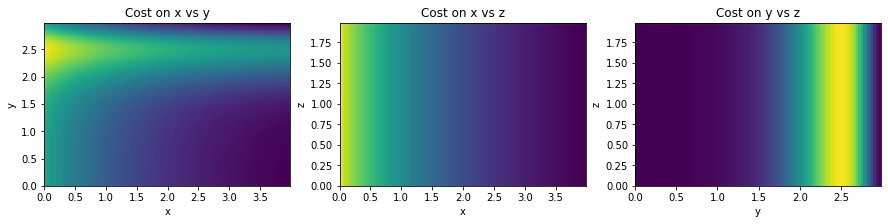

####   Discretized Sapce

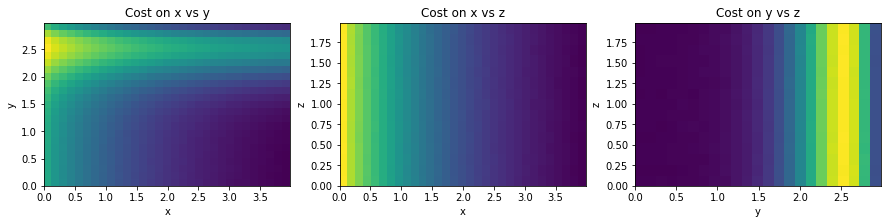

### >>> [8/8] Generating data for context Windows_wired_CA

####   Distribution

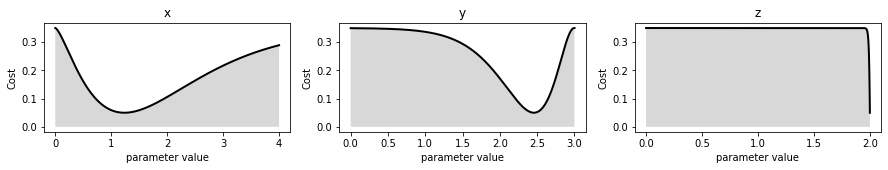

####   Ground Truth

* Cost = 1.9091\*f<sub>x</sub>(x) + 1.104\*f<sub>y</sub>(y) + 0.8355\*f<sub>z</sub>(z) + 1.5007\*f<sub>x</sub>(x)f<sub>y</sub>(y) + 1.3572\*f<sub>x</sub>(x)f<sub>z</sub>(z) + 1.9246\*f<sub>y</sub>(y)f<sub>z</sub>(z) + 0.785\*f<sub>x</sub>(x)f<sub>y</sub>(y)f<sub>z</sub>(z)

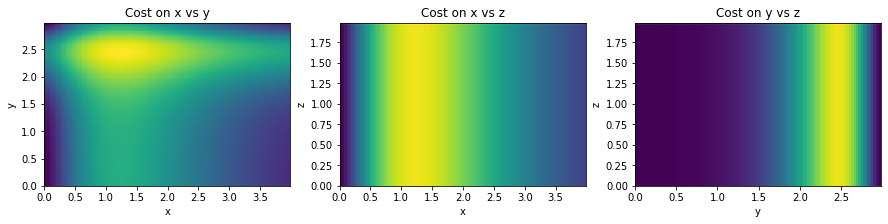

####   Discretized Sapce

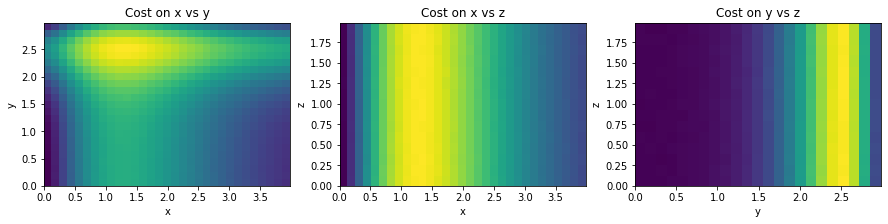

In [6]:
# Adjust
sim.random_changes()
for j, c in enumerate(sim.unique_contexts):
    
    # Context Information
    c_name = '_'.join(c)
    display(Markdown('### >>> [{0}/{1}] Generating data for context {2}'.format(j+1, len(sim.unique_contexts), c_name)))
    display(Markdown('####   Distribution'))

    # Adjust Distribution
    sim.adjust_distributuion(dist_context, dist_base, c, plot=should_plot)
        
    # Adjust Coefficients
    c_coeff = sim.adjust_coefficients(c)

    # Ground Truth
    display(Markdown('####   Ground Truth'))
    sim.discretize(dist_context[c_name], coefficients=c_coeff)
    display(Markdown('* {0}'.format(dist_context[c_name]['configs']['reward_equation'])))

    # Generate ground truth data
    num_values, reward_raw_min, reward_raw_max = sim.gen_data(dist_context[c_name], 1, coefficients=c_coeff, add_error=False, plot_2d=should_plot)
    
    # Generate output data by the specified discretization policies
    display(Markdown('####   Discretized Sapce'))  
    discretized_context[c_name] = copy.deepcopy(dist_context[c_name])
    sim.discretize(discretized_context[c_name], discretization_policy=sim.discretization_policy, coefficients=c_coeff)
    discretized_data, _, _ = sim.gen_data(
        discretized_context[c_name], sim.n_per_config, 
        coefficients=c_coeff, add_error=True, data_min=reward_raw_min, data_max=reward_raw_max, plot_2d=should_plot)
    
    # Save and summarize
    df_context = sim.export_data(c, discretized_data, to_csv=False)
    df_all = df_all.append(df_context)
    df_summary = sim.summarize_df(df_summary, c, num_values)
    


In [7]:
noise_std = str(sim.ci_std).replace('.',',')
num_x = len(sim.discretization_policy["x"])
num_y = len(sim.discretization_policy["y"])
num_z = len(sim.discretization_policy["z"])
run_name = f"{num_x}_{num_y}_{num_z}_{noise_std}"
all_file_path = os.path.join(sim.folder_path, f'df_all_{run_name}.csv')
print(all_file_path)

df_all.to_csv(all_file_path, index=False)

# df_summary.to_csv(sim.summary_file_path, index=False)


/mnt/c/w/repos/slate_sim/data/seed7/df_all_32_24_16_0,1.csv


In [ ]:
df_summary